import dependencies 

In [131]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import psycopg2
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from scipy import stats

load in CSVs

In [132]:
wh_file = "Resources/world-happiness-report-2021.csv"
wh_df = pd.read_csv(wh_file)

In [133]:
wh_df

,Country,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [134]:
oecd_file = "Resources/better_life_index_final.csv"
oecd_df = pd.read_csv(oecd_file)
oecd_df

,Country,Dwellings_without_basic_facilities,Housing_expenditure,Rooms_per_person,Household_net_adjusted_disposable_income,Household_net_wealth,Labour_market_insecurity,Employment_rate,Long_term_unemployment_rate,Personal_earnings,...,Water_quality,Stakeholder_engagement_for_developing_regulations,Voter_turnout,Life_expectancy,Self_reported_health,Life_satisfaction,Feeling_safe_walking_alone_at_night,Homicide_rate,Employees_working_very_long_hours,Time_devoted_to_leisure_and_personal_care
0,Australia,0.0,20,0.0,32759,427064,5.4,73,1.31,49126,...,93,2.7,91,82.5,85,7.3,63.5,1.1,13.04,14.35
1,Austria,0.9,21,1.6,33541,308325,3.5,72,1.84,50349,...,92,1.3,80,81.7,70,7.1,80.6,0.5,6.66,14.55
2,Belgium,1.9,21,2.2,30364,386006,3.7,63,3.54,49675,...,84,2.0,89,81.5,74,6.9,70.1,1.0,4.75,15.70
3,Canada,0.2,22,2.6,30854,423849,6.0,73,0.77,47622,...,91,2.9,68,81.9,88,7.4,82.2,1.3,3.69,14.56
4,Chile,9.4,18,1.2,0,100967,8.7,63,0.00,25879,...,71,1.3,47,79.9,57,6.5,47.9,4.2,9.72,0.00
5,Colombia,23.9,17,1.2,0,0,0.0,67,0.79,0,...,75,1.4,53,76.2,0,6.3,44.4,24.5,26.56,0.00
6,Czech Republic,0.7,24,1.4,21453,0,3.1,74,1.04,25372,...,87,1.6,61,79.1,60,6.7,72.3,0.5,5.65,0.00
7,Denmark,0.5,23,1.9,29606,118637,4.2,74,1.31,51466,...,95,2.0,86,80.9,71,7.6,83.5,0.6,2.34,15.87
8,Estonia,7.0,17,1.6,19697,159373,3.8,74,1.92,24336,...,84,2.7,64,77.8,53,5.7,69.0,3.1,2.42,14.90
9,Finland,0.5,23,1.9,29943,200827,3.9,70,2.13,42964,...,95,2.2,67,81.5,70,7.6,85.1,1.3,3.81,15.17


In [135]:
#merge to create OECD countries only 
country_df = pd.merge(oecd_df, wh_df, how = 'inner', on = "Country")


In [136]:
country_df.head()

,Country,Dwellings_without_basic_facilities,Housing_expenditure,Rooms_per_person,Household_net_adjusted_disposable_income,Household_net_wealth,Labour_market_insecurity,Employment_rate,Long_term_unemployment_rate,Personal_earnings,...,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Australia,0.0,20,0.0,32759,427064,5.4,73,1.31,49126,...,0.159,0.442,2.43,1.453,1.076,0.801,0.647,0.291,0.317,2.598
1,Austria,0.9,21,1.6,33541,308325,3.5,72,1.84,50349,...,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784
2,Belgium,1.9,21,2.2,30364,386006,3.7,63,3.54,49675,...,-0.153,0.646,2.43,1.463,0.998,0.747,0.489,0.088,0.187,2.862
3,Canada,0.2,22,2.6,30854,423849,6.0,73,0.77,47622,...,0.089,0.415,2.43,1.447,1.044,0.798,0.648,0.246,0.335,2.585
4,Chile,9.4,18,1.2,0,100967,8.7,63,0.00,25879,...,-0.044,0.830,2.43,1.200,0.946,0.678,0.438,0.159,0.070,2.682


In [137]:
country_df.keys()

Index(['Country', 'Dwellings_without_basic_facilities', 'Housing_expenditure',
       'Rooms_per_person', 'Household_net_adjusted_disposable_income',
       'Household_net_wealth', 'Labour_market_insecurity', 'Employment_rate',
       'Long_term_unemployment_rate', 'Personal_earnings',
       'Quality_of_support_network', 'Educational_attainment',
       'Student_skills', 'Years_in_education', 'Air_pollution',
       'Water_quality', 'Stakeholder_engagement_for_developing_regulations',
       'Voter_turnout', 'Life_expectancy', 'Self_reported_health',
       'Life_satisfaction', 'Feeling_safe_walking_alone_at_night',
       'Homicide_rate', 'Employees_working_very_long_hours',
       'Time_devoted_to_leisure_and_personal_care', 'Regional_indicator',
       'Ladder_score', 'Standard_error_of_ladder_score', 'upperwhisker',
       'lowerwhisker', 'Logged_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_o

In [138]:
#drop non OECD countries 
country_df = country_df.drop(index = [35, 36])
country_df

,Country,Dwellings_without_basic_facilities,Housing_expenditure,Rooms_per_person,Household_net_adjusted_disposable_income,Household_net_wealth,Labour_market_insecurity,Employment_rate,Long_term_unemployment_rate,Personal_earnings,...,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Australia,0.0,20,0.0,32759,427064,5.4,73,1.31,49126,...,0.159,0.442,2.43,1.453,1.076,0.801,0.647,0.291,0.317,2.598
1,Austria,0.9,21,1.6,33541,308325,3.5,72,1.84,50349,...,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784
2,Belgium,1.9,21,2.2,30364,386006,3.7,63,3.54,49675,...,-0.153,0.646,2.43,1.463,0.998,0.747,0.489,0.088,0.187,2.862
3,Canada,0.2,22,2.6,30854,423849,6.0,73,0.77,47622,...,0.089,0.415,2.43,1.447,1.044,0.798,0.648,0.246,0.335,2.585
4,Chile,9.4,18,1.2,0,100967,8.7,63,0.00,25879,...,-0.044,0.830,2.43,1.200,0.946,0.678,0.438,0.159,0.070,2.682
5,Colombia,23.9,17,1.2,0,0,0.0,67,0.79,0,...,-0.135,0.841,2.43,1.021,0.866,0.615,0.554,0.100,0.063,2.794
6,Czech Republic,0.7,24,1.4,21453,0,3.1,74,1.04,25372,...,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
7,Denmark,0.5,23,1.9,29606,118637,4.2,74,1.31,51466,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
8,Estonia,7.0,17,1.6,19697,159373,3.8,74,1.92,24336,...,-0.106,0.527,2.43,1.344,1.079,0.640,0.641,0.119,0.263,2.103
9,Finland,0.5,23,1.9,29943,200827,3.9,70,2.13,42964,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


Create Dataframes 

In [139]:
country = pd.DataFrame({"Country": country_df["Country"], 
                        "regional_indicator":country_df["Regional_indicator"], 
                        "corruption":country_df["Perceptions_of_corruption"]})
country.head()

,Country,regional_indicator,corruption
0,Australia,North America and ANZ,0.442
1,Austria,Western Europe,0.481
2,Belgium,Western Europe,0.646
3,Canada,North America and ANZ,0.415
4,Chile,Latin America and Caribbean,0.830


In [140]:
economy_df = pd.DataFrame({"country" :country_df["Country"], 
                           "logged_GDP":country_df["Logged_GDP_per_capita"],
                           "perception_of_corruption":country_df["Perceptions_of_corruption"], 
                           "employees_overworked":country_df["Employees_working_very_long_hours"]})
economy_df.head()


,country,logged_GDP,perception_of_corruption,employees_overworked
0,Australia,10.796,0.442,13.04
1,Austria,10.906,0.481,6.66
2,Belgium,10.823,0.646,4.75
3,Canada,10.776,0.415,3.69
4,Chile,10.071,0.830,9.72


In [141]:
environment_df = pd.DataFrame({"country" :country_df["Country"], 
                           "air_pollution":country_df["Air_pollution"],
                           "water_quality":country_df["Water_quality"]})
environment_df.head()

,country,air_pollution,water_quality
0,Australia,5,93
1,Austria,16,92
2,Belgium,15,84
3,Canada,7,91
4,Chile,16,71


In [142]:
qol_df=country_df[['Country','Social_support','Freedom_to_make_life_choices','Employees_working_very_long_hours','Time_devoted_to_leisure_and_personal_care','Rooms_per_person']]


In [143]:
qol_df.columns=['country','social_support','freedom_to_make_life_choices','overworking_employees','leisure_time','rooms_per_person']
qol_df.head()

,country,social_support,freedom_to_make_life_choices,overworking_employees,leisure_time,rooms_per_person
0,Australia,0.940,0.914,13.04,14.35,0.0
1,Austria,0.934,0.908,6.66,14.55,1.6
2,Belgium,0.906,0.783,4.75,15.70,2.2
3,Canada,0.926,0.915,3.69,14.56,2.6
4,Chile,0.882,0.742,9.72,0.00,1.2


In [144]:
health_df=country_df[['Country','Self_reported_health','Healthy_life_expectancy','Freedom_to_make_life_choices']]
health_df.columns=['country','self_reported_health','healthy_life_expectancy','freedom_to_make_life_choices']
health_df.head()

,country,self_reported_health,healthy_life_expectancy,freedom_to_make_life_choices
0,Australia,85,73.900,0.914
1,Austria,70,73.300,0.908
2,Belgium,74,72.199,0.783
3,Canada,88,73.800,0.915
4,Chile,57,70.000,0.742


Connect and create databases 

In [145]:
connection_string = "postgres:AppleBanana12!@localhost:5432/ETLE"
engine = create_engine(f'postgresql://{connection_string}')

In [146]:
engine.table_names()

['country',
 'economy',
 'qol',
 'health',
 'environment',
 'health_envi',
 'employment']

Send to SQL locations 

In [147]:
country.to_sql(name='country', con=engine, if_exists='replace', index=False)

In [148]:
economy_df.to_sql(name='economy', con=engine, if_exists='replace', index=False)

In [149]:
qol_df.to_sql(name='qol', con=engine, if_exists='replace', index=False)

In [150]:
health_df.to_sql(name='health', con=engine, if_exists='replace', index=False)

In [151]:
environment_df.to_sql(name='environment', con=engine, if_exists='replace', index=False)

Data Analysis

In [152]:
corr_matrix=qol_df.corr()
print (corr_matrix)

                              social_support  freedom_to_make_life_choices  \
social_support                      1.000000                      0.650637   
freedom_to_make_life_choices        0.650637                      1.000000   
overworking_employees              -0.519294                     -0.235833   
leisure_time                        0.201569                      0.111538   
rooms_per_person                    0.340206                      0.353332   

                              overworking_employees  leisure_time  \
social_support                            -0.519294      0.201569   
freedom_to_make_life_choices              -0.235833      0.111538   
overworking_employees                      1.000000     -0.100773   
leisure_time                              -0.100773      1.000000   
rooms_per_person                          -0.382446      0.189730   

                              rooms_per_person  
social_support                        0.340206  
freedom_to_make_li

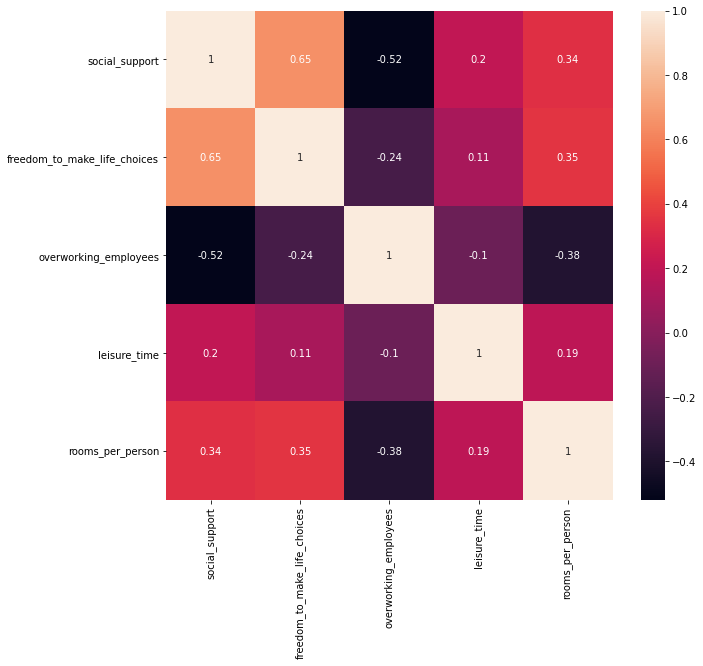

In [153]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [154]:
qol_df.describe()

,social_support,freedom_to_make_life_choices,overworking_employees,leisure_time,rooms_per_person
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.917971,0.844457,7.789143,8.635429,1.625714
std,0.039831,0.098849,7.999608,7.606280,0.500789
min,0.822000,0.576000,0.000000,0.000000,0.000000
25%,0.900500,0.789500,2.980000,0.000000,1.200000
50%,0.934000,0.862000,4.750000,14.420000,1.700000
75%,0.942500,0.914500,10.405000,15.045000,1.900000
max,0.983000,0.960000,32.640000,16.470000,2.600000


In [155]:
# ranking the country with least % of people working long hours
top_country_working_long_hours=qol_df.sort_values('overworking_employees')
top_country_working_long_hours

,country,social_support,freedom_to_make_life_choices,overworking_employees,leisure_time,rooms_per_person
18,Japan,0.884,0.796,0.00,0.00,1.9
31,Switzerland,0.942,0.919,0.37,0.00,1.9
23,Netherlands,0.942,0.913,0.42,0.00,1.9
20,Lithuania,0.935,0.773,0.54,0.00,1.5
30,Sweden,0.934,0.945,1.07,15.18,1.7
19,Latvia,0.927,0.715,1.27,13.83,1.2
7,Denmark,0.954,0.946,2.34,15.87,1.9
8,Estonia,0.941,0.909,2.42,14.90,1.6
25,Norway,0.954,0.960,2.93,15.56,2.1
13,Hungary,0.943,0.755,3.03,0.00,1.2


In [156]:
top_country_working_long_hours.drop(index=18).head(5)

,country,social_support,freedom_to_make_life_choices,overworking_employees,leisure_time,rooms_per_person
31,Switzerland,0.942,0.919,0.37,0.00,1.9
23,Netherlands,0.942,0.913,0.42,0.00,1.9
20,Lithuania,0.935,0.773,0.54,0.00,1.5
30,Sweden,0.934,0.945,1.07,15.18,1.7
19,Latvia,0.927,0.715,1.27,13.83,1.2


In [157]:
top_country_leisure_time=qol_df.sort_values('leisure_time',ascending=False)
top_country_leisure_time

,country,social_support,freedom_to_make_life_choices,overworking_employees,leisure_time,rooms_per_person
17,Italy,0.880,0.693,4.11,16.47,1.4
10,France,0.942,0.822,7.67,16.36,1.8
29,Spain,0.932,0.761,4.01,15.93,1.9
7,Denmark,0.954,0.946,2.34,15.87,1.9
2,Belgium,0.906,0.783,4.75,15.70,2.2
11,Germany,0.903,0.875,4.26,15.62,1.8
25,Norway,0.954,0.960,2.93,15.56,2.1
30,Sweden,0.934,0.945,1.07,15.18,1.7
9,Finland,0.954,0.949,3.81,15.17,1.9
33,United Kingdom,0.934,0.859,12.15,14.92,1.9


In [158]:
top_country_leisure_time.head(5)

,country,social_support,freedom_to_make_life_choices,overworking_employees,leisure_time,rooms_per_person
17,Italy,0.880,0.693,4.11,16.47,1.4
10,France,0.942,0.822,7.67,16.36,1.8
29,Spain,0.932,0.761,4.01,15.93,1.9
7,Denmark,0.954,0.946,2.34,15.87,1.9
2,Belgium,0.906,0.783,4.75,15.70,2.2


In [159]:
health_envi_df = health_df 
health_envi_df["air_pollution"] = environment_df["air_pollution"]
health_envi_df["water_quality"] = environment_df["water_quality"]
health_envi_df.set_index(["country"])
health_envi_df

<ipython-input-159-02ab1764358a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_envi_df["air_pollution"] = environment_df["air_pollution"]
<ipython-input-159-02ab1764358a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_envi_df["water_quality"] = environment_df["water_quality"]


,country,self_reported_health,healthy_life_expectancy,freedom_to_make_life_choices,air_pollution,water_quality
0,Australia,85,73.900,0.914,5,93
1,Austria,70,73.300,0.908,16,92
2,Belgium,74,72.199,0.783,15,84
3,Canada,88,73.800,0.915,7,91
4,Chile,57,70.000,0.742,16,71
5,Colombia,0,68.001,0.837,10,75
6,Czech Republic,60,70.807,0.858,20,87
7,Denmark,71,72.700,0.946,9,95
8,Estonia,53,68.800,0.909,8,84
9,Finland,70,72.000,0.949,6,95


In [160]:
health_envi_df.to_sql(name='health_envi', con=engine, if_exists='replace', index=False)

In [161]:
health_envi_df.describe()

,self_reported_health,healthy_life_expectancy,freedom_to_make_life_choices,air_pollution,water_quality
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,66.571429,71.688971,0.844457,12.485714,83.971429
std,17.230762,2.351593,0.098849,5.175573,9.590086
min,0.000000,67.100000,0.576000,3.000000,65.000000
25%,60.000000,69.851000,0.789500,8.500000,78.000000
50%,70.000000,72.500000,0.862000,13.000000,84.000000
75%,76.000000,73.350000,0.914500,16.000000,91.500000
max,88.000000,75.100000,0.960000,22.000000,99.000000


In [162]:
health_envi_df=health_envi_df.sort_values('healthy_life_expectancy',ascending=False)
health_envi_df.head(5)

,country,self_reported_health,healthy_life_expectancy,freedom_to_make_life_choices,air_pollution,water_quality
18,Japan,36,75.1,0.796,14,87
29,Spain,72,74.7,0.761,11,72
31,Switzerland,78,74.4,0.919,15,95
10,France,66,74.0,0.822,13,81
0,Australia,85,73.9,0.914,5,93


In [163]:
le_poll = health_envi_df
le_poll = le_poll.drop(["self_reported_health", "water_quality", "freedom_to_make_life_choices"], axis = 1)
le_poll.head()

,country,healthy_life_expectancy,air_pollution
18,Japan,75.1,14
29,Spain,74.7,11
31,Switzerland,74.4,15
10,France,74.0,13
0,Australia,73.9,5


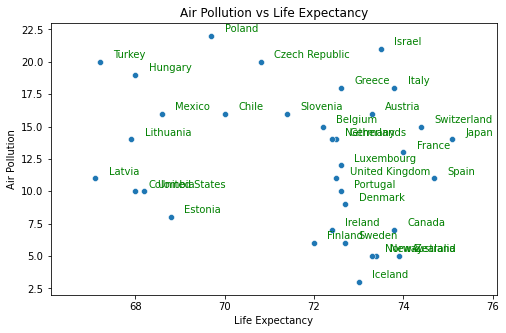

In [164]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=le_poll,x="healthy_life_expectancy",y="air_pollution")
plt.title("Air Pollution vs Life Expectancy") 
plt.xlabel("Life Expectancy") #x label
plt.ylabel("Air Pollution") #y label
for i in range(le_poll.shape[0]):
     plt.text(x=le_poll.healthy_life_expectancy[i]+0.3,y=le_poll.air_pollution[i]+0.3,s=le_poll.country[i], 
          fontdict=dict(color='green',size=10))
plt.xlim(le_poll.healthy_life_expectancy.min()-1,le_poll.healthy_life_expectancy.max()+1)                #set x limit
plt.ylim(le_poll.air_pollution.min()-1,le_poll.air_pollution.max()+1)              #set y limit
plt.show()

In [165]:
le_qual = health_envi_df
le_qual = le_qual.drop(["self_reported_health", "air_pollution", "freedom_to_make_life_choices"], axis = 1)

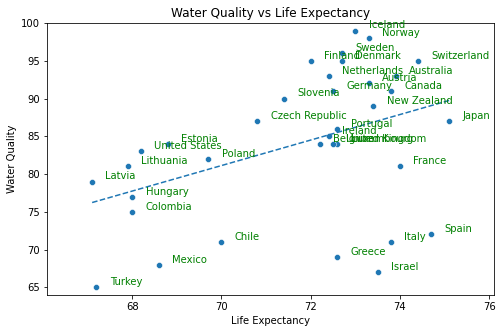

In [166]:
plt.figure(figsize=(8,5))
sn.scatterplot(data=le_qual,x="healthy_life_expectancy",y="water_quality")
plt.title("Water Quality vs Life Expectancy") 
plt.xlabel("Life Expectancy") #x label
plt.ylabel("Water Quality") #y label
for i in range(le_qual.shape[0]):
     plt.text(x=le_qual.healthy_life_expectancy[i]+0.3,y=le_qual.water_quality[i]+0.3,s=le_qual.country[i], 
          fontdict=dict(color='green',size=10))
plt.xlim(le_qual.healthy_life_expectancy.min()-1,le_qual.healthy_life_expectancy.max()+1)
plt.ylim(le_qual.water_quality.min()-1,le_qual.water_quality.max()+1)               
le_slope, le_int, le_r, le_p, le_std_err = stats.linregress(le_qual.healthy_life_expectancy,le_qual.water_quality)
le_fit = le_slope * le_qual.healthy_life_expectancy + le_int
plt.plot(le_qual.healthy_life_expectancy,le_fit,"--")
plt.show()

In [167]:
health_envi_df.columns= ["Country","Self Reported Health", "Healthy Life Expectancy", "Freedom to make life choices", "Air Pollution", "Water Quality "]


In [168]:
corr_matrix=health_envi_df.corr()
print (corr_matrix)

                              Self Reported Health  Healthy Life Expectancy  \
Self Reported Health                      1.000000                 0.444810   
Healthy Life Expectancy                   0.444810                 1.000000   
Freedom to make life choices              0.198477                 0.346798   
Air Pollution                            -0.174043                -0.252587   
Water Quality                             0.239497                 0.414461   

                              Freedom to make life choices  Air Pollution  \
Self Reported Health                              0.198477      -0.174043   
Healthy Life Expectancy                           0.346798      -0.252587   
Freedom to make life choices                      1.000000      -0.594660   
Air Pollution                                    -0.594660       1.000000   
Water Quality                                     0.823879      -0.607097   

                              Water Quality   
Self Reported H

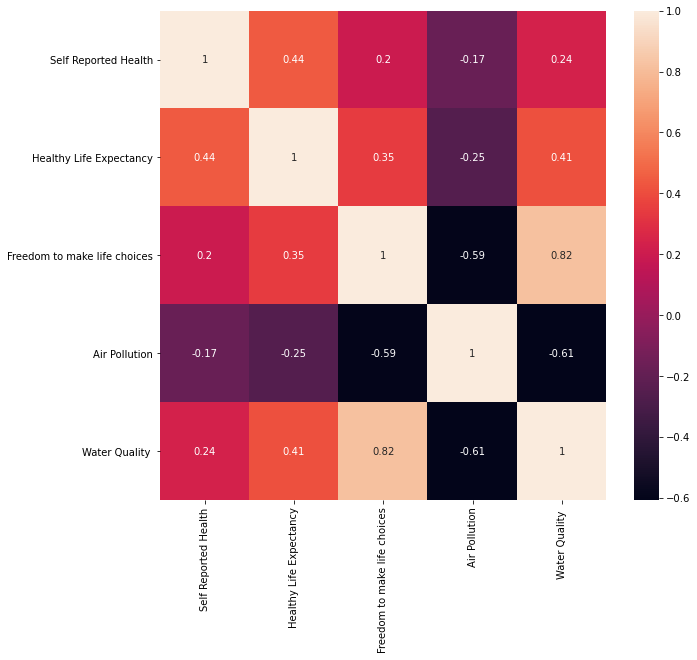

In [169]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [170]:
economy_df.describe()

,logged_GDP,perception_of_corruption,employees_overworked
count,35.000000,35.000000,35.000000
mean,10.649200,0.592400,7.789143
std,0.395839,0.233074,7.999608
min,9.557000,0.179000,0.000000
25%,10.451000,0.400500,2.980000
50%,10.643000,0.646000,4.750000
75%,10.875500,0.803000,10.405000
max,11.647000,0.887000,32.640000


The Correlation Coefficient of the Perception Corruption % vs GDP Per Capita is -0.52


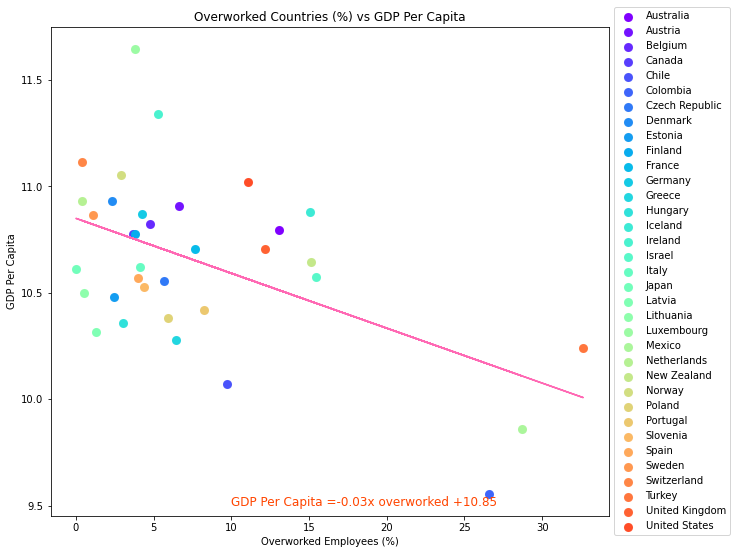

In [171]:
#regression analysis and Correlation Coefficient Test

overworked_line = economy_df["employees_overworked"]
gdp_line = economy_df["logged_GDP"]


slope,intercept, r_value, p_value, std_err = stats.linregress(overworked_line,gdp_line)
line_of_best_fit = slope * overworked_line + intercept
regression_equation = "GDP Per Capita =" + str(round(slope,2)) + "x overworked +" + str(round(intercept,2))


fig, ax = plt.subplots()

colormap = cm.rainbow
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(economy_df["country"]))]

for i,c in enumerate(colorlist):

    x = economy_df["employees_overworked"][i]
    y = economy_df["logged_GDP"][i]
    l = economy_df["country"][i]

    ax.scatter(x, y, label=l, s=80, linewidth=0.1, c=c)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.plot(overworked_line,line_of_best_fit,"r-",color="hotpink")

#format the scatter plot
plt.title(f"Overworked Countries (%) vs GDP Per Capita")
plt.xlabel("Overworked Employees (%)")
plt.ylabel("GDP Per Capita") 
plt.rcParams['figure.figsize'] = [10, 9]
plt.annotate(regression_equation,(10,9.5),fontsize = 12, color = "orangered")

print(f"The Correlation Coefficient of the Perception Corruption % vs GDP Per Capita is {round(stats.pearsonr(overworked_line,gdp_line)[0],2)}")

plt.show()

The Correlation Coefficient of the Perception Corruption % vs GDP Per Capita is -0.67


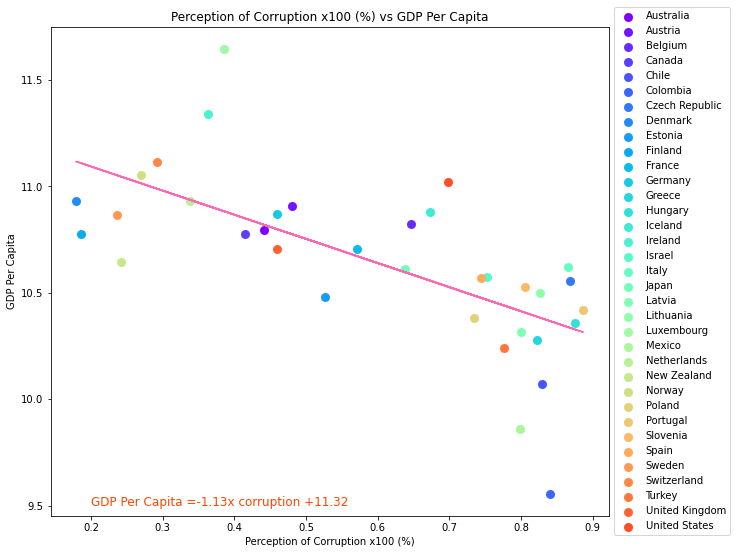

In [172]:
#regression analysis and Correlation Coefficient Test

corruption_line = economy_df["perception_of_corruption"]
gdp_line = economy_df["logged_GDP"]


slope,intercept, r_value, p_value, std_err = stats.linregress(corruption_line,gdp_line)
line_of_best_fit = slope * corruption_line + intercept
regression_equation = "GDP Per Capita =" + str(round(slope,2)) + "x corruption +" + str(round(intercept,2))


fig, ax = plt.subplots()

colormap = cm.rainbow
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(economy_df["country"]))]

for i,c in enumerate(colorlist):

    x = economy_df["perception_of_corruption"][i]
    y = economy_df["logged_GDP"][i]
    l = economy_df["country"][i]

    ax.scatter(x, y, label=l, s=80, linewidth=0.1, c=c)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.plot(corruption_line,line_of_best_fit,"r-",color="hotpink")

#format the scatter plot
plt.title(f"Perception of Corruption x100 (%) vs GDP Per Capita")
plt.xlabel("Perception of Corruption x100 (%)")
plt.ylabel("GDP Per Capita") 
plt.rcParams['figure.figsize'] = [10, 9]
print(f"The Correlation Coefficient of the Perception Corruption % vs GDP Per Capita is {round(stats.pearsonr(corruption_line,gdp_line)[0],2)}")
plt.annotate(regression_equation,(0.2,9.5),fontsize = 12, color = "orangered")


plt.show()

In [173]:
corrMatrix = economy_df.corr()
print (corrMatrix)

                          logged_GDP  perception_of_corruption  \
logged_GDP                  1.000000                 -0.667499   
perception_of_corruption   -0.667499                  1.000000   
employees_overworked       -0.521469                  0.299558   

                          employees_overworked  
logged_GDP                           -0.521469  
perception_of_corruption              0.299558  
employees_overworked                  1.000000  


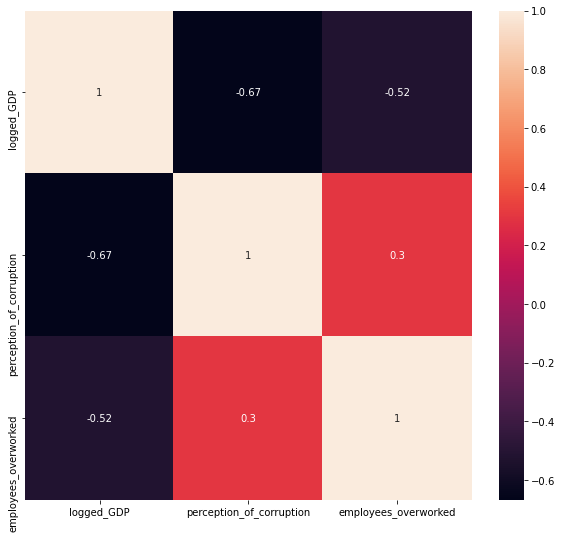

In [174]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [175]:
health_df.head()

,country,self_reported_health,healthy_life_expectancy,freedom_to_make_life_choices,air_pollution,water_quality
0,Australia,85,73.900,0.914,5,93
1,Austria,70,73.300,0.908,16,92
2,Belgium,74,72.199,0.783,15,84
3,Canada,88,73.800,0.915,7,91
4,Chile,57,70.000,0.742,16,71


In [177]:
Self_reported_health = health_df.sort_values('self_reported_health', ascending=False)
Self_reported_health

,country,self_reported_health,healthy_life_expectancy,freedom_to_make_life_choices,air_pollution,water_quality
34,United States,88,68.200,0.837,10,83
3,Canada,88,73.800,0.915,7,91
24,New Zealand,88,73.400,0.929,5,89
0,Australia,85,73.900,0.914,5,93
16,Israel,84,73.503,0.800,21,67
15,Ireland,83,72.400,0.879,7,85
31,Switzerland,78,74.400,0.919,15,95
25,Norway,77,73.300,0.960,5,98
14,Iceland,76,73.000,0.955,3,99
23,Netherlands,76,72.400,0.913,14,93


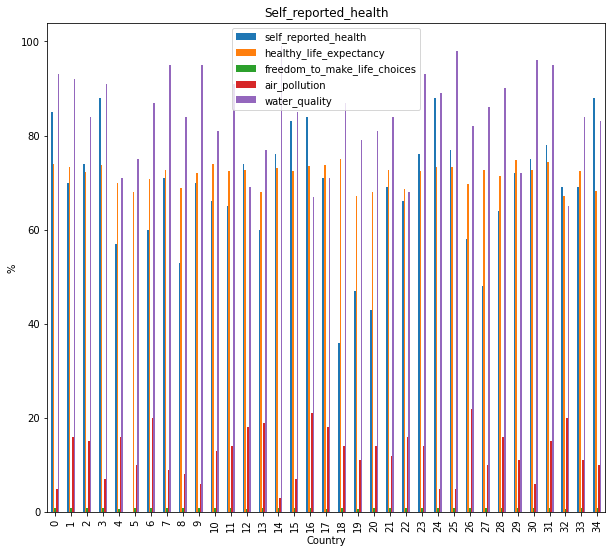

<Figure size 720x648 with 0 Axes>

In [178]:
resulth = health_df.plot(kind="bar")
resulth.set_xlabel("Country")
resulth.set_ylabel("%")
plt.title("Self_reported_health")
plt.show()
plt.tight_layout()

In [179]:
social_df=country_df[['Country','Quality_of_support_network','Social_support']]
social_df.head(5)

,Country,Quality_of_support_network,Social_support
0,Australia,95,0.940
1,Austria,92,0.934
2,Belgium,91,0.906
3,Canada,93,0.926
4,Chile,85,0.882


In [180]:
social_support=social_df.sort_values('Social_support',ascending=False)
social_support

,Country,Quality_of_support_network,Social_support
14,Iceland,98,0.983
25,Norway,94,0.954
7,Denmark,95,0.954
9,Finland,95,0.954
24,New Zealand,96,0.948
28,Slovenia,92,0.948
15,Ireland,95,0.947
6,Czech Republic,91,0.947
13,Hungary,86,0.943
31,Switzerland,93,0.942


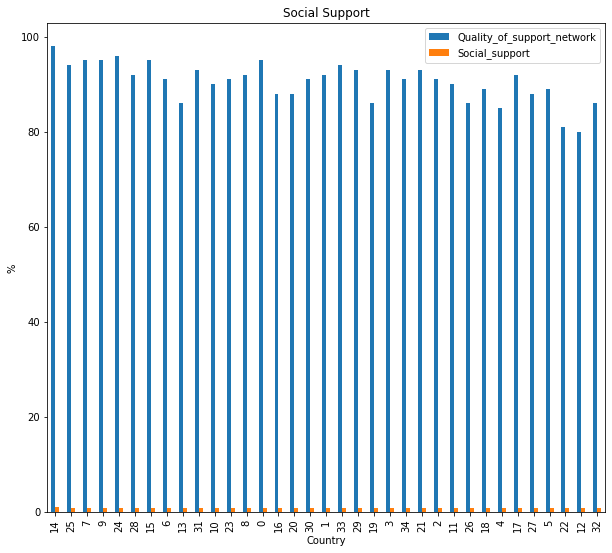

<Figure size 720x648 with 0 Axes>

In [181]:
resulth = social_support.plot(kind="bar")
resulth.set_xlabel("Country")
resulth.set_ylabel("%")
plt.title("Social Support")
plt.show()
plt.tight_layout()